### Load Data

In [416]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

data = datasets.load_digits()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target).rename("target")

In [417]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [418]:
print('Train: X=%s, y=%s' % (X_train.shape, X_test.shape))
print('Test:  X=%s, y=%s' % (X_test.shape, y_test.shape))

Train: X=(1437, 64), y=(360, 64)
Test:  X=(360, 64), y=(360,)


In [419]:
images = X_train.values.reshape(len(X_train), 8, 8)

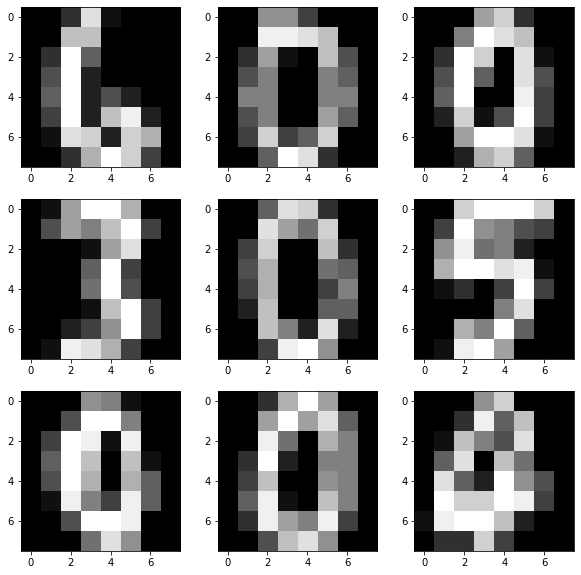

In [420]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
for i in range(3):
    for j in range(3):
        ax[i][j].imshow(images[3*i+j], cmap="gray")

### Metrics

<img src="https://miro.medium.com/max/1126/1*NhPwqJdAyHWllpeHAqrL_g.png">

In [421]:
y_test.value_counts()

5    47
4    46
9    40
6    35
3    34
7    34
0    33
2    33
8    30
1    28
Name: target, dtype: int64

### Basic Model

In [422]:
df = X_train.copy()
df["label"] = y_train.copy()

avg_table = df.groupby(["label"]).mean()

In [423]:
avg_table

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
label,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.013793,4.158621,13.131034,11.572414,3.151724,0.041379,0.000000,0.000000,0.875862,...,2.351724,0.000000,0.000000,0.000000,4.110345,13.634483,13.455172,5.351724,0.220690,0.000000
1,0.0,0.012987,2.435065,9.155844,10.512987,6.227273,0.987013,0.000000,0.000000,0.090909,...,2.090909,0.623377,0.000000,0.006494,2.253247,9.019481,13.051948,8.409091,2.915584,1.389610
2,0.0,0.979167,9.840278,14.173611,9.458333,2.555556,0.125000,0.000000,0.013889,5.263889,...,7.076389,0.583333,0.006944,0.958333,10.305556,14.027778,13.312500,12.006944,8.305556,2.006944
3,0.0,0.718121,8.483221,14.167785,14.275168,7.590604,0.785235,0.006711,0.013423,4.355705,...,6.013423,0.040268,0.000000,0.550336,9.375839,14.550336,13.704698,8.489933,1.442953,0.026846
4,0.0,0.000000,0.429630,7.029630,11.614815,2.148148,0.237037,0.170370,0.000000,0.074074,...,0.029630,0.000000,0.000000,0.029630,0.525926,7.748148,12.007407,2.007407,0.000000,0.000000
5,0.0,1.044444,10.348148,13.037037,13.748148,11.948148,4.170370,0.051852,0.007407,4.118519,...,1.229630,0.000000,0.000000,1.007407,10.866667,14.792593,9.118519,2.185185,0.133333,0.000000
6,0.0,0.000000,1.075342,11.047945,9.863014,1.554795,0.013699,0.000000,0.000000,0.041096,...,10.664384,0.589041,0.000000,0.000000,1.335616,10.616438,15.082192,13.109589,4.472603,0.102740
7,0.0,0.117241,4.979310,13.013793,14.220690,11.020690,5.393103,1.075862,0.000000,0.931034,...,0.000000,0.000000,0.000000,0.089655,6.289655,11.834483,2.289655,0.013793,0.000000,0.000000
8,0.0,0.138889,5.097222,11.590278,12.465278,6.277778,0.506944,0.000000,0.020833,1.951389,...,2.347222,0.006944,0.000000,0.152778,5.090278,12.694444,13.083333,6.729167,1.097222,0.013889


              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       0.73      0.79      0.76        28
           2       0.88      0.91      0.90        33
           3       0.97      0.94      0.96        34
           4       0.98      0.93      0.96        46
           5       0.93      0.83      0.88        47
           6       0.97      0.97      0.97        35
           7       0.92      0.97      0.94        34
           8       0.86      0.80      0.83        30
           9       0.77      0.85      0.81        40

    accuracy                           0.90       360
   macro avg       0.90      0.90      0.90       360
weighted avg       0.90      0.90      0.90       360



<AxesSubplot:>

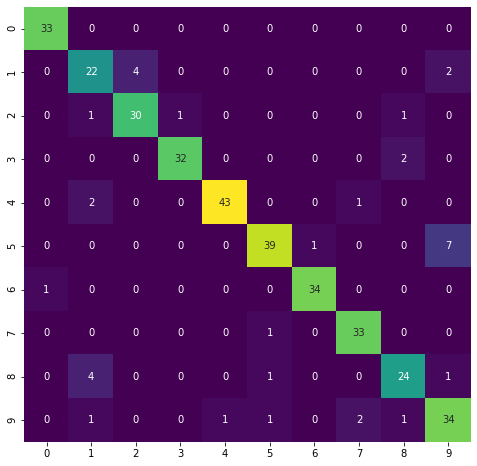

In [424]:
preds = list()

for i in range(len(X_test)):
    preds.append(((avg_table - X_test.iloc[i])**2).sum(1).argmin())
    
print(classification_report(y_test.values, preds))

conf = confusion_matrix(y_test.values, preds)

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf, annot=True, fmt="g", cbar=False, ax=ax, cmap="viridis")

### Show Avg Image

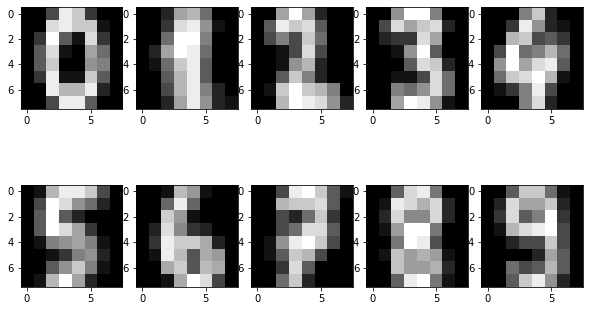

In [425]:
_ = avg_table.astype(int)
avg_imgs = _.values.reshape(10,8,8)

fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(8, 8))
for i in range(2):
    for j in range(5):
        ax[i][j].imshow(avg_imgs[5*i+j], cmap="gray")
        fig.tight_layout(pad=0)

##### Scale & Model



              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       0.73      0.79      0.76        28
           2       0.88      0.91      0.90        33
           3       0.97      0.94      0.96        34
           4       0.98      0.93      0.96        46
           5       0.93      0.83      0.88        47
           6       0.97      0.97      0.97        35
           7       0.92      0.97      0.94        34
           8       0.86      0.80      0.83        30
           9       0.77      0.85      0.81        40

    accuracy                           0.90       360
   macro avg       0.90      0.90      0.90       360
weighted avg       0.90      0.90      0.90       360



<AxesSubplot:>

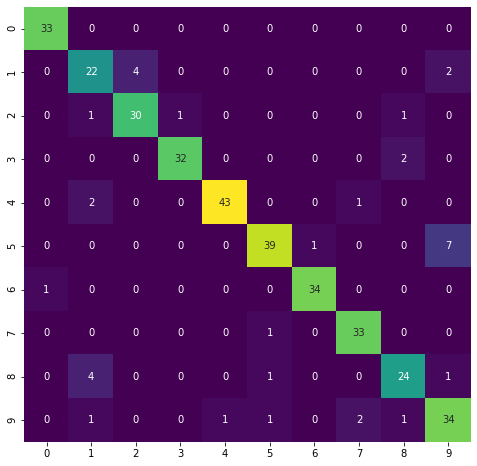

In [426]:
X_train, X_test = X_train/16, X_test/16

df = X_train.copy()
df["label"] = y_train.copy()

avg_table = df.groupby(["label"]).mean()

preds = list()

for i in range(len(X_test)):
    preds.append(((avg_table - X_test.iloc[i])**2).sum(1).argmin())
    
print(classification_report(y_test.values, preds))

conf = confusion_matrix(y_test.values, preds)

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf, annot=True, fmt="g", cbar=False, ax=ax, cmap="viridis")

### LogReg Model

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.96      0.96      0.96        28
           2       0.97      1.00      0.99        33
           3       1.00      0.97      0.99        34
           4       1.00      0.98      0.99        46
           5       0.91      0.91      0.91        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.90      0.95      0.93        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


<AxesSubplot:>

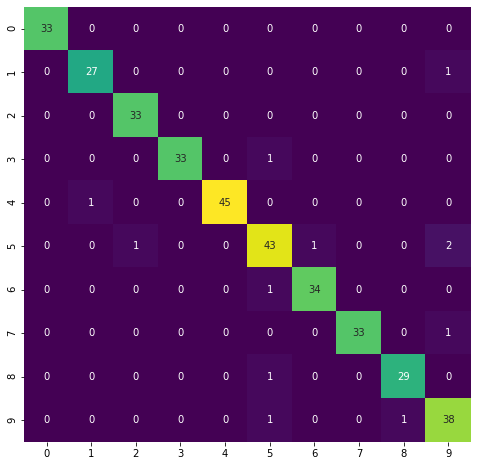

In [427]:
model = LogisticRegression()

model.fit(X_train, y_train)

preds = model.predict(X_test)

print(classification_report(y_test, preds))

conf = confusion_matrix(y_test, preds)

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf, annot=True, fmt="g", cbar=False, ax=ax, cmap="viridis")

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.92      0.96      0.94        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.98       360



<AxesSubplot:>

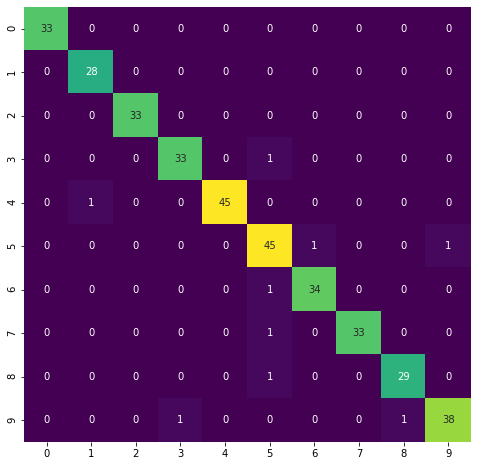

In [428]:
model = LogisticRegression(C=100)

model.fit(X_train, y_train)

preds = model.predict(X_test)

print(classification_report(y_test, preds))

conf = confusion_matrix(y_test, preds)

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf, annot=True, fmt="g", cbar=False, ax=ax, cmap="viridis")

### Binary Classification - LogReg

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       320
           1       0.87      0.85      0.86        40

    accuracy                           0.97       360
   macro avg       0.93      0.92      0.92       360
weighted avg       0.97      0.97      0.97       360



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


<AxesSubplot:>

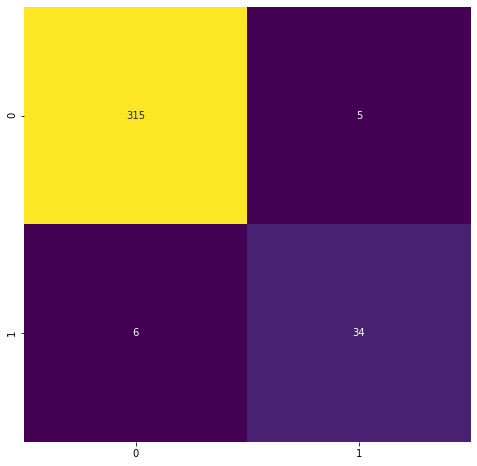

In [429]:
data = datasets.load_digits()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target).rename("target")
y = (y == 9).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

preds = model.predict(X_test)
probs = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, preds))

conf = confusion_matrix(y_test, preds)

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf, annot=True, fmt="g", cbar=False, ax=ax, cmap="viridis")

##### Coeffs

In [430]:
coeffs = pd.Series(model.coef_.T.ravel(), index=data.feature_names)
coeffs.sort_values()

pixel_0_1   -1.413065
pixel_5_3   -1.354788
pixel_4_1   -1.288007
pixel_7_1   -0.899700
pixel_7_7   -0.607860
               ...   
pixel_6_7    0.385076
pixel_4_3    0.389089
pixel_0_3    0.390385
pixel_3_5    0.405303
pixel_2_5    0.623642
Length: 64, dtype: float64

<AxesSubplot:xlabel='pixel_0_1', ylabel='count'>

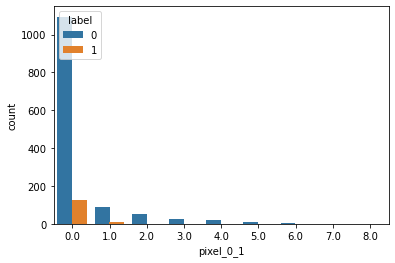

In [431]:
df = X_train.copy()
df["label"] = y_train.copy()

sns.countplot(data=df, x="pixel_0_1", hue="label")

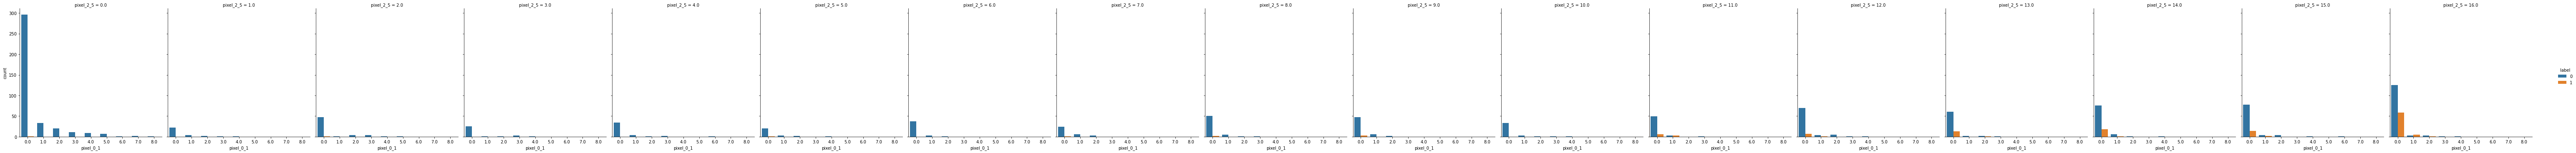

In [432]:
sns.catplot(x="pixel_0_1", hue="label", col="pixel_2_5",
                data=df, kind="count")

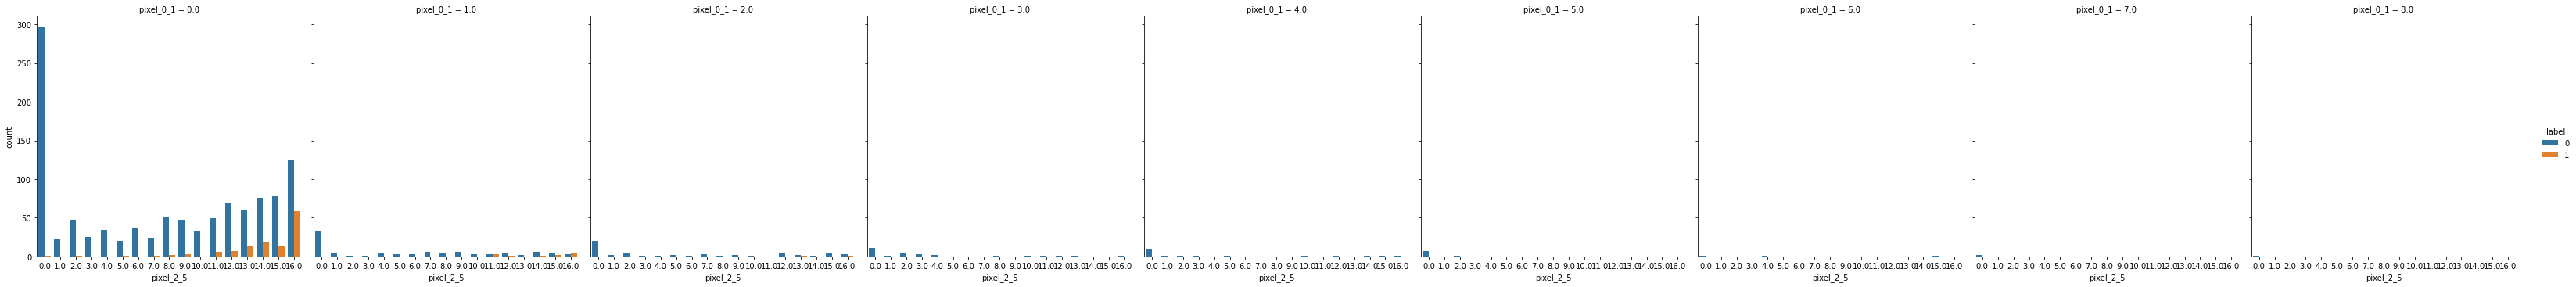

In [433]:
sns.catplot(x="pixel_2_5", hue="label", col="pixel_0_1",
                data=df, kind="count")

##### ROC Curve

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.990


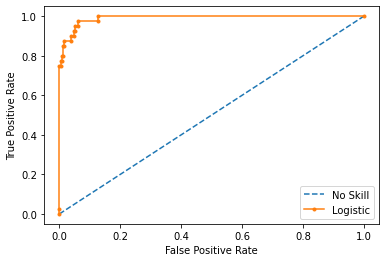

In [434]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [435]:
lr_tpr

array([0.   , 0.025, 0.75 , 0.75 , 0.775, 0.775, 0.8  , 0.8  , 0.85 ,
       0.85 , 0.875, 0.875, 0.9  , 0.9  , 0.925, 0.925, 0.95 , 0.95 ,
       0.975, 0.975, 1.   , 1.   ])

In [436]:
conf = pd.DataFrame(y_test)
conf["probs"] = probs
conf["probs"] = conf["probs"].round(4)
conf = conf.sort_values("probs")

conf["cumcount"] = conf.groupby("target").cumcount()

conf = conf.join(conf[conf["target"] == 0]["cumcount"].rename("count_0")).fillna(method="ffill")
conf["count_0"] = conf["count_0"].astype(int)

conf = conf.join(conf[conf["target"] == 1]["cumcount"].rename("count_1")).fillna(method="ffill").fillna(0)
conf["count_1"] = conf["count_1"].astype(int)

In [437]:
conf[conf["count_1"] - conf["count_1"].shift(1).fillna(0) == 1]

,target,probs,cumcount,count_0,count_1
275,1,0.0035,1,299,1
555,1,0.0086,2,303,2
69,1,0.0139,3,304,3
1582,1,0.0580,4,307,4
29,1,0.4196,5,314,5
1454,1,0.5860,6,315,6
1488,1,0.6085,7,315,7
1786,1,0.7957,8,316,8
381,1,0.9174,9,317,9
1706,1,0.9723,10,319,10


## EDA

In [466]:
data = datasets.load_digits()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target).rename("target")
y = (y == 9).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1437.0,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,...,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000
mean,0.0,0.310369,5.227557,11.821851,11.890745,5.841336,1.377871,0.144746,0.005567,1.983299,...,3.744607,0.202505,0.000696,0.281837,5.563674,12.082116,11.853166,6.797495,2.096729,0.369520
std,0.0,0.908631,4.809070,4.286111,4.279237,5.633652,3.392994,1.105158,0.091244,3.214218,...,4.904326,0.937486,0.026380,0.919025,5.133010,4.395515,4.891584,5.894031,4.143286,1.875436
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,10.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [467]:
y_train.value_counts().sort_index()

0    1297
1     140
Name: target, dtype: int64

#### Check std

In [468]:
_ = X_train.std() == 0
constant_cols = list(_[_ == True].index)

In [469]:
X_train[constant_cols]

,pixel_0_0,pixel_4_0,pixel_4_7
1734,0.0,0.0,0.0
855,0.0,0.0,0.0
1642,0.0,0.0,0.0
175,0.0,0.0,0.0
925,0.0,0.0,0.0
...,...,...,...
1130,0.0,0.0,0.0
1294,0.0,0.0,0.0
860,0.0,0.0,0.0
1459,0.0,0.0,0.0


In [470]:
X_train = X_train.drop(constant_cols,1)
X_test = X_test.drop(constant_cols,1)

### Feature Engineering

In [471]:
X_train["sum"] = X_train.sum(1)
X_train["count"] = (X_train > 7).sum(1)

X_test["sum"] = X_test.sum(1)
X_test["count"] = (X_test > 7).sum(1)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       320
           1       0.89      0.82      0.86        40

    accuracy                           0.97       360
   macro avg       0.94      0.91      0.92       360
weighted avg       0.97      0.97      0.97       360



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


<AxesSubplot:>

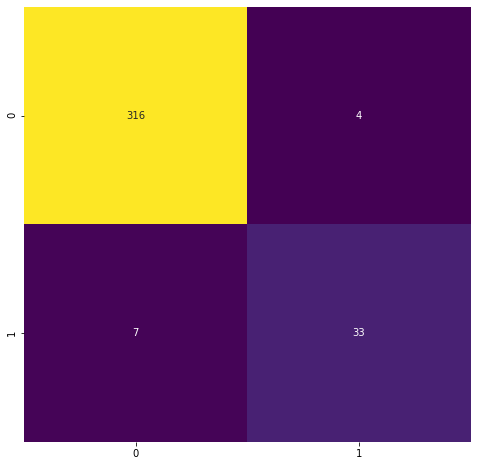

In [472]:
model = LogisticRegression()

model.fit(X_train, y_train)

preds = model.predict(X_test)

print(classification_report(y_test, preds))

conf = confusion_matrix(y_test, preds)

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf, annot=True, fmt="g", cbar=False, ax=ax, cmap="viridis")

In [473]:
coeffs = pd.Series(model.coef_.T.ravel(), index=X_train.columns)
coeffs.sort_values()

pixel_5_3   -1.158712
pixel_4_1   -0.705698
pixel_5_2   -0.660474
pixel_5_4   -0.371857
pixel_0_5   -0.269736
               ...   
pixel_1_2    0.345753
pixel_3_3    0.515645
pixel_3_5    0.560460
pixel_4_3    0.576067
pixel_2_5    0.687978
Length: 63, dtype: float64

In [474]:
coeffs["count"]

0.16528462946260528

In [475]:
coeffs["sum"]

-0.09868758991472028

In [476]:
X_train["mean"] = X_train.mean(1)
X_test["mean"] = X_test.mean(1)

### Correlated Features

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       320
           1       0.90      0.88      0.89        40

    accuracy                           0.97       360
   macro avg       0.94      0.93      0.94       360
weighted avg       0.97      0.97      0.97       360



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


<AxesSubplot:>

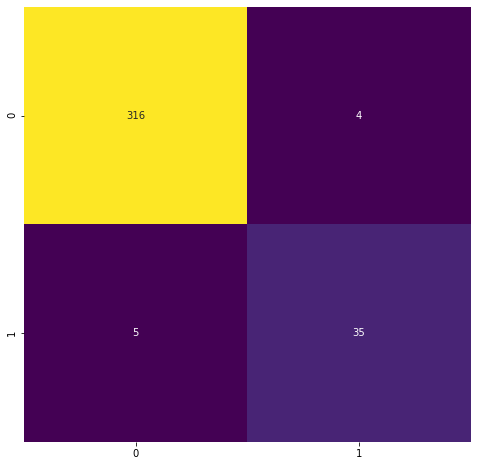

In [477]:
model = LogisticRegression()

model.fit(X_train, y_train)

preds = model.predict(X_test)

print(classification_report(y_test, preds))

conf = confusion_matrix(y_test, preds)

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf, annot=True, fmt="g", cbar=False, ax=ax, cmap="viridis")

In [478]:
coeffs = pd.Series(model.coef_.T.ravel(), index=X_train.columns)
coeffs.sort_values()

pixel_5_3   -1.238652
pixel_4_1   -0.779723
pixel_5_2   -0.601599
pixel_5_4   -0.348835
pixel_3_4   -0.318537
               ...   
pixel_1_6    0.365967
pixel_3_3    0.548850
pixel_4_3    0.548854
pixel_3_5    0.609075
pixel_2_5    0.724396
Length: 64, dtype: float64

In [479]:
coeffs["count"]

0.18736843502951436